# Bolivian  Odds Data
## 2. Feature Matrix and Visual Exploration
This notebook seeks to explore the data through visualizations using seaborn and matplot lib and also to create new features based on team performance throughout each season

In [272]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.style as style
import matplotlib.pyplot as plt
import seaborn as sns
import string
import matplotlib.ticker as ticker
import re
from collections import Counter
style.use('fivethirtyeight')


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [273]:
# Reading the prepared csv file
odds = pd.read_csv('/Users/miketondu/Dropbox/Data Science/Sharpest Minds/odds_data/bolivian_football_odds_prepared.csv',
                   parse_dates=['date'])


### Feature Engineering
Create more complex features based on location and running averages throughout the seasons

In [274]:
odds.head()

match  \
0           Blooming - San Jose   
1        The Strongest - Ciclon   
2        Blooming - Real Potosi   
3       The Strongest - Guabira   
4  Blooming - Oriente Petrolero   

                                          match_href bookmakers  home_odds  \
0  https://www.oddsportal.com/soccer/bolivia/liga...     Unibet       2.29   
1  https://www.oddsportal.com/soccer/bolivia/liga...     Unibet       1.25   
2  https://www.oddsportal.com/soccer/bolivia/liga...       bwin       1.70   
3  https://www.oddsportal.com/soccer/bolivia/liga...     Unibet       1.55   
4  https://www.oddsportal.com/soccer/bolivia/liga...       bwin       2.40   

   draw_odds  away_odds  payout       date   time  season_year      home_team  \
0       3.15       2.80    0.90 2013-08-04  00:00         2013       Blooming   
1       5.25       9.00    0.91 2016-04-17  19:00         2016  The Strongest   
2       3.40       4.33    0.90 2014-04-12  21:00         2014       Blooming   
3       3.50       5.50    0.90 2010-03-31  22:00         2010  The Strongest   
4       3.10       2.70    0.90 2012-04-29  22:30         2012       Blooming   

           away_team final_result  home_goals  away_goals  first_half_home  \
0           San Jose          0:0           0           0                0   
1             Ciclon          4:2           4           2                2   
2        Real Potosi          2:0           2           0                1   
3            Guabira          2:1           2           1                1   
4  Oriente Petrolero          2:2           2           2                2   

   first_half_away  second_half_home  second_half_away  total_goals  \
0                0                 0                 0            0   
1                0                 2                 2            6   
2                0                 1                 0            2   
3                1                 1                 0            3   
4                2                 0                 0            4   

   total_first_half  total_second_half  win_home_or_away         winner  \
0                 0                  0                 0           Draw   
1                 2                  4                 1  The Strongest   
2                 1                  1                 1       Blooming   
3                 2                  1                 1  The Strongest   
4                 4                  0                 0           Draw   

   implied_home_odds  implied_draw_odds  implied_away_odds  upset  altitude  
0              0.437              0.317              0.357      0       0.0  
1              0.800              0.190              0.111      0       1.0  
2              0.588              0.294              0.231      0       0.0  
3              0.645              0.286              0.182      0       1.0  
4              0.417              0.323              0.370      0       0.0

In [265]:
# HOME_WINS
# Keeping only unique matches   
df_unique = odds.drop_duplicates('match_href')
#df_unique.set_index('match_href',inplace=True)

# Creating home win column
def home_win_column(dataframe):
    if dataframe['win_home_or_away'] == 1:
        return 1
    else:
        return 0
df_unique['home_win'] = df_unique.apply(lambda x: home_win_column(x) , axis=1)


# Creating reduced dataframe with home wins
df_unique = df_unique.loc[:,['home_team','away_team','date','season_year','home_win']]
df_unique.sort_values(by='date',inplace=True)

# Wide format data
df_unique = df_unique.pivot_table(index=['home_team','date','season_year'], 
                                  columns='away_team', 
                                  values='home_win',aggfunc=sum)

# Creating incremental wins column
df_unique['incr_wins'] = df_unique.apply(lambda x: x.sum(),axis=1)

# Group_by team and season year
df_unique = (df_unique.groupby(['home_team', 'season_year'])
             .cumsum().groupby(['home_team', 'season_year'])
             .shift(1)
             .fillna(0))

df_unique.rename(columns={'incr_wins':'home_wins'},inplace=True)
df_unique = df_unique['home_wins'].reset_index()

/Users/miketondu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [270]:
# GOAL: make a function that will get you the number of wins for different columns (home_win, away_win,)
def matrix_func(dataframe, target_col):
    def home_win_column(dataframe):
        if dataframe['win_home_or_away'] == 1:
            return 1
        else:
            return 0
    df_unique[target_col] = df_unique.apply(lambda x: home_win_column(x) , axis=1)

    dataframe = odds.drop_duplicates('match_href')
    dataframe = dataframe.loc[:,['home_team','away_team','date','season_year', target_col]]
    

In [269]:
# merging the dataframes
df_unique = df_unique['home_wins']#.reset_index()
odds.merge(df_unique, on=['home_team', 'date'], how='left')



ValueError: can not merge DataFrame with instance of type <class 'pandas.core.series.Series'>

In [271]:
df_unique

0        0.0
1        0.0
2        0.0
3        1.0
4        2.0
5        3.0
6        3.0
7        4.0
8        5.0
9        5.0
10       5.0
11       6.0
12       7.0
13       8.0
14       9.0
15       9.0
16      10.0
17      10.0
18      10.0
19      11.0
20       0.0
21       1.0
22       1.0
23       0.0
24       0.0
25       1.0
26       1.0
27       2.0
28       2.0
29       3.0
30       3.0
31       4.0
32       0.0
33       0.0
34       0.0
35       1.0
36       1.0
37       2.0
38       3.0
39       3.0
40       3.0
41       4.0
42       5.0
43       5.0
44       5.0
45       6.0
46       7.0
47       8.0
48       8.0
49       9.0
50       9.0
51      10.0
52      11.0
53      12.0
54       0.0
55       0.0
56       1.0
57       2.0
58       3.0
59       4.0
60       4.0
61       4.0
62       4.0
63       5.0
64       6.0
65       6.0
66       7.0
67       8.0
68       9.0
69       9.0
70      10.0
71      11.0
72       0.0
73       0.0
74       0.0
75       1.0
76       1.0

In [261]:
odds.home_team.head(1000)

0                  Blooming
1             The Strongest
2                  Blooming
3             The Strongest
4                  Blooming
5               Wilstermann
6           Nacional Potosi
7             The Strongest
8                    Aurora
9                  U. Sucre
10                   Aurora
11        Oriente Petrolero
12     Petrolero de Yacuiba
13              Real Potosi
14              Real Potosi
15                 Blooming
16                   Aurora
17        Oriente Petrolero
18        Oriente Petrolero
19                 U. Sucre
20               Sport Boys
21          Nacional Potosi
22                  Bolivar
23            The Strongest
24                 U. Sucre
25                 U. Sucre
26                   Ciclon
27        Oriente Petrolero
28                 Blooming
29            The Strongest
30                 San Jose
31              Real Potosi
32              Real Potosi
33                  Guabira
34     Petrolero de Yacuiba
35              Wils

In [233]:
# AWAY_WINS

# Keeping only unique matches
df_unique = odds[odds['bookmakers'] == 'Unibet']
df_unique.set_index('match_href',inplace=True)

# creating away win column
def away_win_column(dataframe):
    if dataframe['win_home_or_away'] == 2:
        return 1
    else:
        return 0
df_unique['away_win'] = df_unique.apply(lambda x: away_win_column(x) , axis=1)

# Creating reduced dataframe with home wins
df_unique = df_unique.loc[:,['home_team','away_team','date','season_year','away_win']]
df_unique.sort_values(by='date',inplace=True)

# Wide format data
df_unique = df_unique.pivot_table(index=['away_team','date','season_year'], 
                                  columns='home_team', 
                                  values='away_win',aggfunc=sum)

# Creating incremental wins column
df_unique['incr_wins'] = df_unique.apply(lambda x: x.sum(),axis=1)

# Group_by team and season year
df_unique = df_unique.groupby(['away_team', 'season_year']).cumsum()

df_unique.rename(columns={'incr_wins':'away_wins'},inplace=True)
df_unique

/Users/miketondu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Always Ready  Aurora  Blooming  \
away_team            date       season_year                                   
Always Ready         2019-01-19 2019                  NaN     NaN       NaN   
                     2019-01-30 2019                  NaN     NaN       NaN   
                     2019-02-08 2019                  NaN     NaN       NaN   
                     2019-02-16 2019                  NaN     NaN       NaN   
                     2019-02-20 2019                  NaN     NaN       NaN   
                     2019-03-06 2019                  NaN     NaN       NaN   
                     2019-03-14 2019                  NaN     NaN       NaN   
                     2019-03-27 2019                  NaN     NaN       NaN   
                     2019-04-14 2019                  NaN     NaN       NaN   
                     2019-04-21 2019                  NaN     NaN       0.0   
                     2019-05-04 2019                  NaN     0.0       NaN   
                     2019-05-15 2019                  NaN     NaN       NaN   
                     2019-05-23 2019                  NaN     NaN       NaN   
                     2019-07-16 2019                  NaN     NaN       NaN   
                     2019-07-28 2019                  NaN     NaN       NaN   
                     2019-08-06 2019                  NaN     NaN       NaN   
                     2019-08-10 2019                  NaN     NaN       NaN   
                     2019-08-14 2019                  NaN     NaN       NaN   
                     2019-08-25 2019                  NaN     NaN       1.0   
                     2019-09-14 2019                  NaN     0.0       NaN   
                     2019-09-26 2019                  NaN     NaN       NaN   
                     2019-10-19 2019                  NaN     NaN       NaN   
Aurora               2009-08-27 2009                  NaN     NaN       NaN   
                     2009-09-13 2009                  NaN     NaN       NaN   
                     2009-11-05 2009                  NaN     NaN       NaN   
                     2009-11-08 2009                  NaN     NaN       0.0   
                     2010-03-07 2010                  NaN     NaN       NaN   
                     2010-03-13 2010                  NaN     NaN       NaN   
                     2010-03-21 2010                  NaN     NaN       NaN   
                     2010-04-25 2010                  NaN     NaN       NaN   
                     2010-04-29 2010                  NaN     NaN       NaN   
                     2010-05-07 2010                  NaN     NaN       0.0   
                     2010-05-20 2010                  NaN     NaN       NaN   
                     2010-05-28 2010                  NaN     NaN       NaN   
                     2010-06-03 2010                  NaN     NaN       NaN   
                     2010-06-17 2010                  NaN     NaN       NaN   
                     2010-08-22 2010                  NaN     NaN       NaN   
                     2010-08-26 2010                  NaN     NaN       NaN   
                     2010-08-29 2010                  NaN     NaN       NaN   
                     2010-09-11 2010                  NaN     NaN       NaN   
                     2010-09-19 2010                  NaN     NaN       1.0   
                     2010-10-17 2010                  NaN     NaN       NaN   
                     2010-10-29 2010                  NaN     NaN       NaN   
                     2010-10-31 2010                  NaN     NaN       NaN   
                     2010-11-14 2010                  NaN     NaN       NaN   
                     2010-11-28 2010                  NaN     NaN       NaN   
                     2011-01-30 2011                  NaN     NaN       NaN   
                     2011-02-12 2011                  NaN     NaN       NaN   
                     2011-02-25 2011                  NaN     NaN       NaN   
                

### Matrix Function

AttributeError: 'str' object has no attribute 'str'

### Visualization and Exploration

/Users/miketondu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


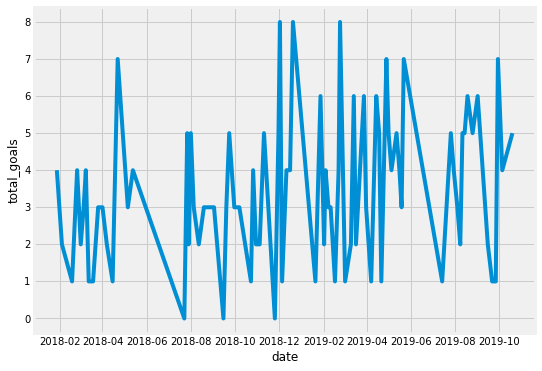

In [13]:
# Graph 1
axes, fig = plt.subplots(figsize=(8,6))
sns.lineplot(data=odds[(odds['date']>'2018')&((odds['home_team']=='Blooming') |( odds['away_team']=='Blooming')) ], x='date',
             y='total_goals', markers=True)

In [50]:
odds.groupby('winner')['upset'].size().sort_values(ascending=False)

winner
Draw                    4639
Bolivar                 1946
The Strongest           1857
San Jose                1561
Wilstermann             1503
Oriente Petrolero       1467
Blooming                1334
Nacional Potosi         1177
Real Potosi             1156
U. Sucre                 969
Sport Boys               807
Guabira                  771
Aurora                   501
Petrolero de Yacuiba     444
Royal Pari               391
Destroyers               225
Always Ready             175
Ciclon                   132
La Paz                   131
Real Mamore              104
U. Pando                  43
Name: upset, dtype: int64

In [47]:
odds.groupby('winner').size()

winner
Always Ready             175
Aurora                   501
Blooming                1334
Bolivar                 1946
Ciclon                   132
Destroyers               225
Draw                    4639
Guabira                  771
La Paz                   131
Nacional Potosi         1177
Oriente Petrolero       1467
Petrolero de Yacuiba     444
Real Mamore              104
Real Potosi             1156
Royal Pari               391
San Jose                1561
Sport Boys               807
The Strongest           1857
U. Pando                  43
U. Sucre                 969
Wilstermann             1503
dtype: int64

In [276]:
odds.to_csv('bolivian_football_odds_prepared.csv')